# lab4

### Importing the libraries

In [37]:
#You may need to add other libraries here depending on your code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #数据可视化	
import seaborn as sb


# to display plots in Jupyter notebook
%matplotlib inline

plt.rcParams['font.size'] = '12'#所有 Matplotlib 绘制的图形（包括标题、标签、图例等）都使用相同的字体12大小，你可以通过这行代码一次性设置。

### 1. Loading the data

Load the data and create your training and test datasets.

In [38]:
#Hint: Look at the function pd.read_csv()

#df_train = ...
df_train = pd.read_csv('training.csv')
#df_test = ...
df_test = pd.read_csv('testing.csv')

### 2. Quick inspecting the data

Inspect what the columns are. Try the different options as discussed in lectures (e.g. head() and info() functions). Don't forget to use appropriate formatting in your output answers. What can you observe? Are there any issues with the data?

In [39]:
column_trheadings = df_train.columns #储存表头
column_tstheadings = df_test.columns

#format your print, e.g.
#print('Column headings are: ',column_headings)

# 用于检查训练数据的列名
print("Training set column headings:", column_trheadings)
print("First 5 lines of training set:")
print(df_train.head())
print("Info of training set:")
print(df_train.info())

print("Training set column headings:", column_tstheadings)
print("First 5 lines of training set:")
print(df_test.head())
print("Info of test set:")
print(df_test.info())

Training set column headings: Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       'pred_minus_obs_H_b1', 'pred_minus_obs_H_b2', 'pred_minus_obs_H_b3',
       'pred_minus_obs_H_b4', 'pred_minus_obs_H_b5', 'pred_minus_obs_H_b6',
       'pred_minus_obs_H_b7', 'pred_minus_obs_H_b8', 'pred_minus_obs_H_b9',
       'pred_minus_obs_S_b1', 'pred_minus_obs_S_b2', 'pred_minus_obs_S_b3',
       'pred_minus_obs_S_b4', 'pred_minus_obs_S_b5', 'pred_minus_obs_S_b6',
       'pred_minus_obs_S_b7', 'pred_minus_obs_S_b8', 'pred_minus_obs_S_b9'],
      dtype='object')
First 5 lines of training set:
  class  b1  b2  b3   b4  b5   b6   b7  b8  b9  ...  pred_minus_obs_H_b9  \
0     d  67  51  68  115  69  111  136  31  67  ...                -9.17   
1     s  67  28  51   99  50   97   82  26  59  ...                -2.25   
2     s  63  26  50   95  49   91   81  26  57  ...                -0.44   
3     d  63  42  63   97  66  108  111  28  59  ...                -2.34   
4     s  4

### 3. Removing some columns from the dataset

We are going to drop all the columns *pred_minus_obs...*, i.e., we keep only the first 10 columns: the *class* column and the columns b1, b2, ..., b9. Don't forget to apply these changes to the training and test sets. 

In [40]:
#You need to create a code to remove the undesired columns from the training and testing sets. After that,
#inspect what your datasets look like. Do you have the correct data matrix structure (that is, rows represent the examples 
#and columns represent the attributes?

#遍历training集的表头，查找所有以'pred_minus_obs'开头的表头名，返回col（即for前面的col） 放在列表 columns_to_drop中
columns_to_drop = [col for col in column_trheadings if col.startswith('pred_minus_obs')]
df_train = df_train.drop(columns=columns_to_drop)#删除columns 在列名列表为 columns_to_drop中的列
df_test = df_test.drop(columns = columns_to_drop)

### 4. Counting the number of instances in each class

According to the UCI Machine Learning website, this dataset has 4 class labels given in the first column of the csv file: Class: *s* ('Sugi' forest), *h* ('Hinoki' forest), *d* ('Mixed deciduous' forest), *o* ('Other' non-forest land). Write Python code to count instances/examples for each class label in your datasets. Are they imbalanced? 

In [41]:
# value_counts() 是 Pandas Series 对象的方法，用于统计某个列中每个唯一值的出现次数
class_counts_train = df_train['class'].value_counts()
class_counts_test = df_test['class'].value_counts()
print("Class counts in training set", class_counts_train)
print("Class counts in test set", class_counts_test)
#判断是否为imbalance数据集
    #严重不平衡：某些类别占比很小，比如 90% 的数据属于一个类别，另一个类别只有 10%。或类别比例差距 >10 倍，比如 1000:50。
    #轻微不平衡（可能影响模型）：某些类别的样本数量大约是其他类别的 3-5 倍。
is_imbalanced_train = class_counts_train.max()/class_counts_train.min()>10 #这里以10倍为判断标准
is_imbalanced_test = class_counts_test.max()/class_counts_test.min()>10
print("Is training set imbalanced:", is_imbalanced_train)
print("Is test set imbalanced:", is_imbalanced_test)

Class counts in training set class
s    136
d    105
o     46
h     38
Name: count, dtype: int64
Class counts in test set class
s    59
d    54
h    48
o    37
Name: count, dtype: int64
Is training set imbalanced: False
Is test set imbalanced: False


### 5. Doing some data visualisation 

Use appropriate functions to display (visualise) the different features (attributes/columns). You can also incorporate class information. Do you observe any aspect of the data that should be addressed?

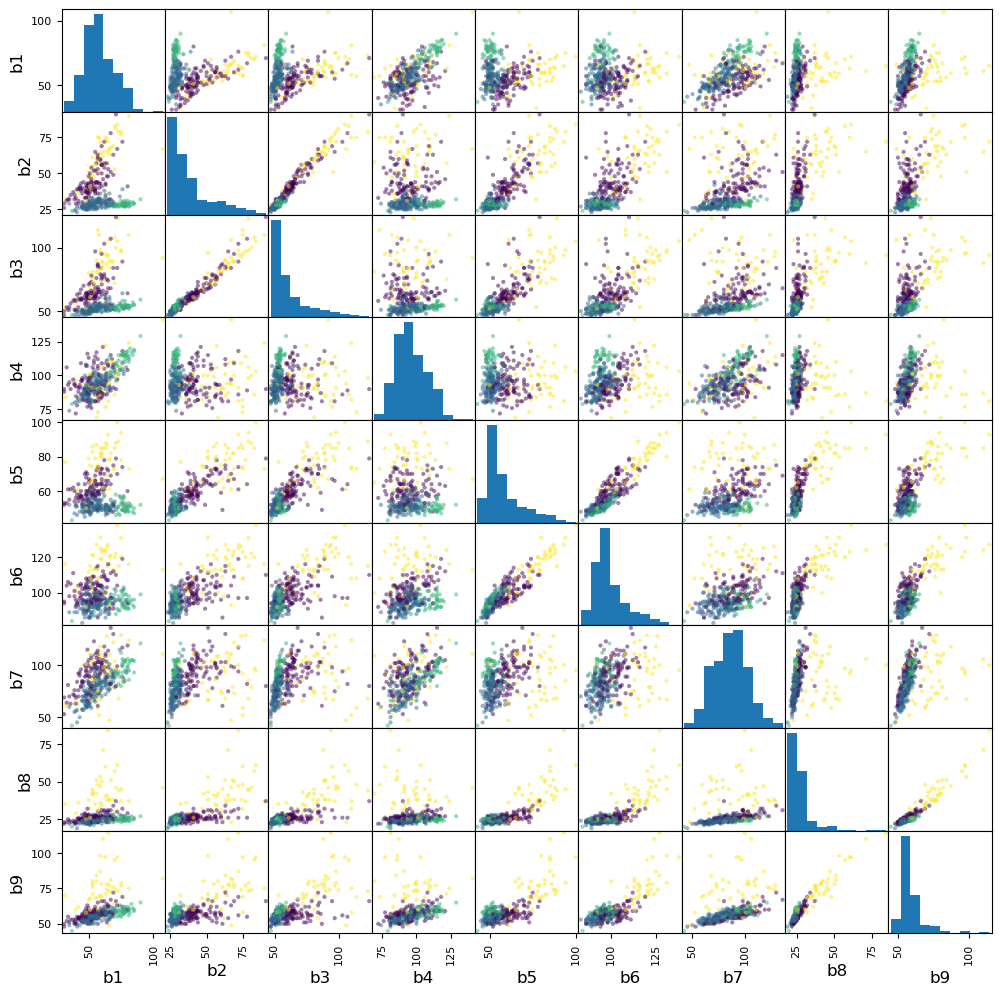

In [15]:
# Tip: explore different options, like histograms, scatter plots, etc. Check out how to make some nice plots with the seaborn package.

#lab2-sol的方案
from pandas.plotting import scatter_matrix

class_labels,_ = pd.factorize(df_train['class'])
df_features = df_train[[f'b{i}' for i in range(1,10)]]#f'b{i}' 是一种 f-string 格式化方式，用来在字符串中嵌入变量。

scatter_matrix(df_features, figsize=(12, 12), diagonal='hist', alpha=0.5, c=class_labels)
plt.show()


In [42]:
# all class will be used in this lab
# ----------------- lab 4 -----------------
#Task 1
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Splitting data into features (X) and target (y)
X_train = df_train.drop('class', axis=1)# axis=1：沿着列方向（横向）操作,不是对每一列的行进行操作。这里是删除列 'class'
y_train = df_train['class']# 提取'class'列作为目标变量
X_test = df_test.drop('class', axis=1)
y_test = df_test['class']


#特征缩放--标准化 (Standardization) 
'''尤其是对于基于距离的算法（如线性回归、KNN、SVM等）和梯度下降优化的算法。
用于对数据进行标准化，确保不同特征的尺度一致（例如，原来一个特征可能的值在 1 到 1000 之间，而另一个特征可能在 0 到 1 之间）
标准化的目的是将数据转化为均值为 0，标准差为 1 的分布，使得每个特征在相同的尺度上进行比较'''

scaler = StandardScaler()  # 创建StandardScaler实例
scaler.fit(X_train) # 仅使用训练集拟合scaler。fit_transform() = fit()+transform()，会直接转换数据

# 使用训练集参数转换训练集和测试集
#transform() 方法用于将数据标准化。
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [43]:
#Task 2 Vector Machine Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 定义超参数搜索范围
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf','poly', 'sigmoid']
}


# 创建 SVM 分类器（在 sklearn.svm.SVC 中，默认使用 one-versus-one (OvO) 策略进行多类别分类）
svm_clf = SVC()

# 使用GridSearchCV 进行超参数搜索+3-fold 交叉验证
grid_search = GridSearchCV(svm_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

#用最佳参数创建SVM分类器
best_C = grid_search.best_params_['C']
best_ke = grid_search.best_params_['kernel']

#使用最佳参数训练最终模型
best_svm = grid_search.best_estimator_
best_svm.fit(X_train_scaled, y_train)

# 在测试集上评估
accuracy = best_svm.score(X_test_scaled, y_test)# score方法不需要手动 predict（）
print(f"Accuracy of SVM multiclass classification: {accuracy:.4f}")

# Task 3 输出最佳参数
print("Best value of C:", best_C)
print("Best value of Kernel:", best_ke)

cv_results = grid_search.cv_results_  # 获取交叉验证的结果
mean_test_scores = cv_results['mean_test_score']  # 平均准确率
split_test_scores = [cv_results[f'split{i}_test_score'] for i in range(3)]  # 每一折的准确率得分

# 打印每一折的准确率
for i, scores in enumerate(split_test_scores):
    print(f"Fold {i+1} Accuracy: {scores[grid_search.best_index_]:.4f}")   # 使用最佳超参数的索引

Accuracy of SVM multiclass classification: 0.9192
Best value of C: 1
Best value of Kernel: rbf
Fold 1 Accuracy: 0.8624
Fold 2 Accuracy: 0.9259
Fold 3 Accuracy: 0.8889


In [44]:
# Task 4 检查性能
# (a) The accuracy in the training and test sets;
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = best_svm.predict(X_train_scaled)
y_test_pred = best_svm.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9077
Test Accuracy: 0.9192


In [46]:
# (b) The confusion matrix on the test set.
test_cmat = confusion_matrix(y_test, y_test_pred)
print("Testing Set Confusion Matrix:\n", test_cmat)


Testing Set Confusion Matrix:
 [[53  0  1  0]
 [ 0 39  0  9]
 [ 3  0 34  0]
 [ 1  2  0 56]]


In [48]:
# Task 5 without scaling, repeat steps 2-4
#Task 2 Vector Machine Classifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# 定义超参数搜索范围
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf','poly', 'sigmoid']
}

# 创建 SVM 分类器（在 sklearn.svm.SVC 中，默认使用 one-versus-one (OvO) 策略进行多类别分类）
svm_clf = SVC()

# 使用GridSearchCV 进行超参数搜索+3-fold 交叉验证
grid_search = GridSearchCV(svm_clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

#用最佳参数创建SVM分类器
best_C = grid_search.best_params_['C']
best_ke = grid_search.best_params_['kernel']

#使用最佳参数训练最终模型
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

# 在测试集上评估
accuracy = best_svm.score(X_test, y_test)# score方法不需要手动 predict（）
print(f"Accuracy of SVM multiclass classification: {accuracy:.4f}")


Accuracy of SVM multiclass classification: 0.9091
Best value of C: 1
Best value of Kernel: poly
Fold 1 Accuracy: 0.8899
Fold 2 Accuracy: 0.9167
Fold 3 Accuracy: 0.8704


In [50]:
# Task 3 输出最佳参数
print("Best value of C:", best_C)
print("Best value of Kernel:", best_ke)

cv_results = grid_search.cv_results_  # 获取交叉验证的结果
mean_test_scores = cv_results['mean_test_score']  # 平均准确率
split_test_scores = [cv_results[f'split{i}_test_score'] for i in range(3)]  # 每一折的准确率得分

# 打印每一折的准确率
for i, scores in enumerate(split_test_scores):
    print(f"Fold {i+1} Accuracy: {scores[grid_search.best_index_]:.4f}")   # 使用最佳超参数的索引

Best value of C: 1
Best value of Kernel: poly
Fold 1 Accuracy: 0.8899
Fold 2 Accuracy: 0.9167
Fold 3 Accuracy: 0.8704


In [49]:
# Task 4 检查性能
# (a) The accuracy in the training and test sets;
from sklearn.metrics import accuracy_score, confusion_matrix

y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train)
test_accuracy = accuracy_score(y_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# (b) The confusion matrix on the test set.
test_cmat = confusion_matrix(y_test, y_test_pred)
print("Testing Set Confusion Matrix:\n", test_cmat)

Train Accuracy: 1.0000
Test Accuracy: 1.0000
Testing Set Confusion Matrix:
 [[53  0  1  0]
 [ 1 38  0  9]
 [ 3  0 34  0]
 [ 1  3  0 55]]


### Task 7
一个完整流程。可以背诵

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 读取数据
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('testing.csv')

# 选择需要的特征列
def clean_cols(df: pd.DataFrame) -> pd.DataFrame:
    return df[['class'] + [f'b{i}' for i in range(1, 10)]]

df_train = clean_cols(df_train)
df_test = clean_cols(df_test)

# 分割特征和目标变量
X_train, y_train = df_train[[f'b{i}' for i in range(1, 10)]], df_train['class']
X_test, y_test = df_test[[f'b{i}' for i in range(1, 10)]], df_test['class']

# 设定 Logistic Regression 模型
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# 设定超参数搜索范围
param_grid = {
    'logisticregression__penalty': ['l2', None],  # 正则化类型
    'logisticregression__C': np.logspace(-4, 4, 10)  # 10 个 C 值
}

# 采用流水线预处理数据（标准化 + 逻辑回归）
pipeline = make_pipeline(StandardScaler(), log_reg)

# 进行 Grid Search 和 3-fold 交叉验证
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),  # 3 折交叉验证
    scoring='f1_weighted',  # 采用加权 F1-score 作为评分指标
    n_jobs=-1  # 并行计算加速
)

# 训练模型
grid_search.fit(X_train, y_train)

# 输出最优超参数
print(f'Optimal hyperparameters: {grid_search.best_params_}')

# 计算训练集和测试集的准确率
train_accuracy = grid_search.best_estimator_.score(X_train, y_train)
test_accuracy = grid_search.best_estimator_.score(X_test, y_test)

print(f'Train accuracy: {train_accuracy:.3f}')
print(f'Test accuracy: {test_accuracy:.3f}')
